<a href="https://colab.research.google.com/github/caramos84/2674492/blob/main/ClasificadorImagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Clasificador de imágenes
# Herramienta de clasificación de imágenes de ropa
# Basado en el ejercicio: https://www.youtube.com/watch?v=j6eGHROLKP8
# Carlos Ramos
# 12/02/2025

# Importación de librerías
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
# Importación de datasets
datos, metadatos = tfds.load("fashion_mnist", as_supervised=True, with_info=True)

metadatos

datos_entrenamiento, datos_pruebas = datos["train"], datos["test"]

nombres_clases = metadatos.features["label"].names

nombres_clases

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.VV1RFN_3.0.1/fashion_mnist-train.tfrecord*...:   …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.VV1RFN_3.0.1/fashion_mnist-test.tfrecord*...:   0…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [3]:
metadatos

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_dir=PosixGPath('/tmp/tmp7984_3jmtfds'),
    file_format=tfrecord,
    download_size=Unknown size,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao

In [4]:
datos_entrenamiento, datos_pruebas = datos["train"], datos["test"]

In [5]:
nombres_clases = metadatos.features["label"].names

In [6]:
nombres_clases

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [8]:
# Normalización de datos
def normalizar(imagenes, etiquetas):
	imagenes = tf.cast(imagenes, tf.float32)
	imagenes /= 255 # Paso de 0-255 a 0-1
	return imagenes, etiquetas

# Normalizar datos de entrenamiento
datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)

# Agregar a caché
datos_entrenamiento = datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()

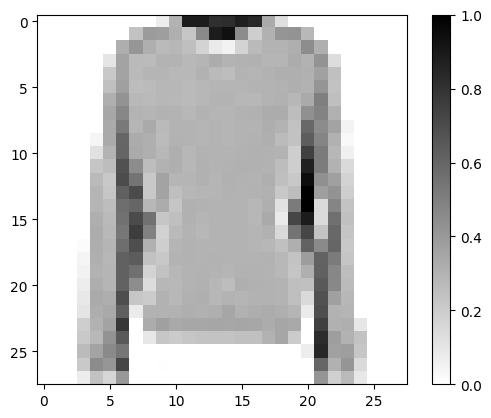

In [9]:
# Mostrar imagen datos pruebas
for imagen, etiqueta in datos_entrenamiento.take(1):
	break
imagen = imagen.numpy().reshape((28,28))

import matplotlib.pyplot as plt

# Dibujar
plt.figure()
plt.imshow(imagen, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

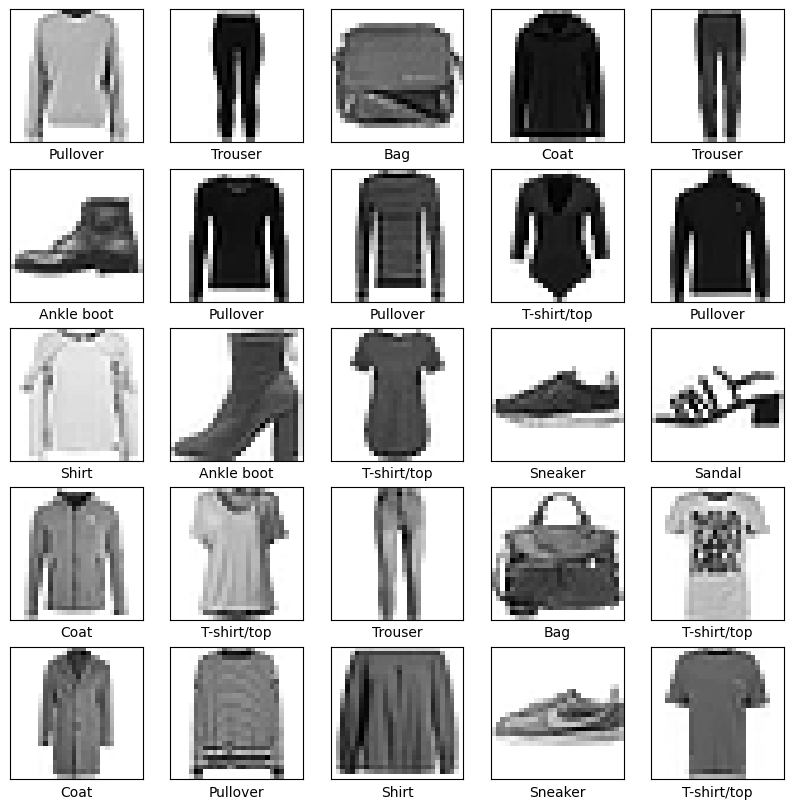

In [10]:
plt.figure(figsize=(10,10))
for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
	imagen = imagen.numpy().reshape((28,28))
	plt.subplot(5,5,i+1)
	plt.xticks([])
	plt.yticks([])
	plt.grid(False)
	plt.imshow(imagen, cmap=plt.cm.binary)
	plt.xlabel(nombres_clases[etiqueta])
plt.show()

In [12]:
# Crear modelo
modelo = tf.keras.Sequential([
	tf.keras.layers.Flatten(input_shape=(28,28,1)),
	tf.keras.layers.Dense(50, activation=tf.nn.relu),
	tf.keras.layers.Dense(50, activation=tf.nn.relu),
	tf.keras.layers.Dense(10, activation=tf.nn.softmax),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
# Compilación
modelo.compile(
	optimizer="adam",
	loss=tf.keras.losses.SparseCategoricalCrossentropy(),
	metrics=["accuracy"]
)

In [14]:
#Definir tamaño lotes
num_ej_entrenamiento = metadatos.splits["train"].num_examples
num_ej_pruebas = metadatos.splits["test"].num_examples

print(num_ej_entrenamiento)
print(num_ej_pruebas)

TAMANO_LOTE = 32

datos_entrenamiento = datos_entrenamiento.repeat().shuffle(num_ej_entrenamiento).batch(TAMANO_LOTE)
datos_pruebas = datos_pruebas.batch(TAMANO_LOTE)

60000
10000


In [17]:
# Entrenamiento
import math
historial = modelo.fit(datos_entrenamiento, epochs=5, steps_per_epoch= math.ceil(num_ej_entrenamiento/TAMANO_LOTE))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.7519 - loss: 0.7103
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8605 - loss: 0.3850
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8729 - loss: 0.3504
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8792 - loss: 0.3267
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8833 - loss: 0.3068


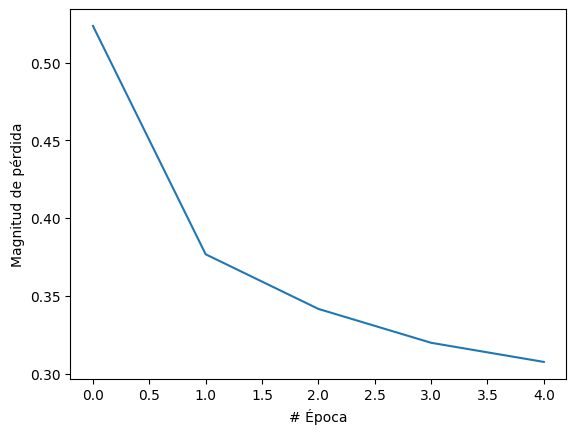

In [18]:
# Historial de pérdida
plt.xlabel("# Época")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


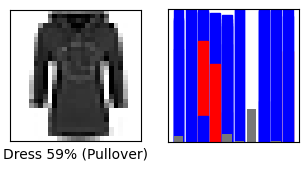

In [32]:
# Predictor
import numpy as np
import matplotlib.pyplot as plt

for imagenes_prueba, etiquetas_prueba in datos_pruebas.take(1):
	imagenes_prueba = imagenes_prueba.numpy()
	etiquetas_prueba = etiquetas_prueba.numpy()
	predicciones = modelo.predict(imagenes_prueba)

def graficar_imagen(i, arr_predicciones, etiquetas_reales, imagenes):
	arr_predicciones, etiqueta_real, img = arr_predicciones[i], etiquetas_reales[i], imagenes[i]
	plt.grid(False)
	plt.xticks([])
	plt.yticks([])

	plt.imshow(img[...,0], cmap=plt.cm.binary)

	etiqueta_prediccion = np.argmax(arr_predicciones)
	if etiqueta_prediccion == etiqueta_real:
		color = "blue" # Acertado
	else:
		color = "red" # Fallo

	plt.xlabel("{} {:2.0f}% ({})". format(
		nombres_clases[etiqueta_prediccion],
		100*np.max(arr_predicciones),
		nombres_clases[etiqueta_real],
		color = color
	))

def graficar_valor_arreglo(i, arr_predicciones, etiqueta_real):
	arr_predicciones, etiqueta_real = arr_predicciones[i], etiqueta_real[i]
	plt.grid(False)
	plt.xticks([])
	plt.yticks([])
	grafica = plt.bar(range(10), arr_predicciones, color="#777777")
	plt.ylim([0,1])
	etiqueta_prediccion =np.argmax(arr_predicciones)

	grafica[etiqueta_prediccion].set_color("red")
	grafica[etiqueta_real].set_color("blue")

filas = 5
columnas = 5
num_imagenes = filas*columnas
plt.figure(figsize=(2*2*columnas, 2*filas))
for i in range(num_imagenes):
	plt.subplot(filas, 2*columnas, 2*1+1)
	graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
	plt.subplot(filas, 2*columnas, 2*1+2)
	graficar_valor_arreglo(i, predicciones, etiquetas_prueba)